# Aykırı değeri yakalamak

In [104]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [105]:
df_table = df["table"]

In [106]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: xlabel='table'>

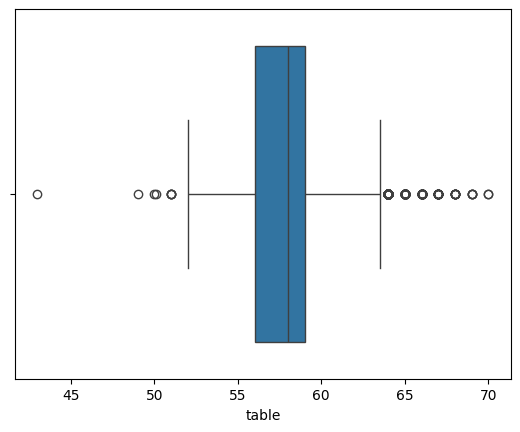

In [107]:
sns.boxplot(x=df_table)

In [108]:
df_table.describe()

count    21680.000000
mean        57.760078
std          2.222104
min         43.000000
25%         56.000000
50%         58.000000
75%         59.000000
max         70.000000
Name: table, dtype: float64

In [109]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = 1.5 * (Q3 - Q1)

In [110]:
Q1

np.float64(56.0)

In [111]:
Q3

np.float64(59.0)

In [112]:
lower_limit = Q1 - IQR

In [113]:
upper_limit = Q3 + IQR

In [114]:
lower_limit

np.float64(51.5)

In [115]:
upper_limit

np.float64(63.5)

In [116]:
(df_table > lower_limit) & (df_table < upper_limit)

0         True
1         True
2        False
3         True
4         True
         ...  
21675     True
21676     True
21677     True
21678     True
21679     True
Name: table, Length: 21680, dtype: bool

In [117]:
aykiri_tf = (df_table < lower_limit) | (df_table > upper_limit)

In [118]:
aykiri_tf

0        False
1        False
2         True
3        False
4        False
         ...  
21675    False
21676    False
21677    False
21678    False
21679    False
Name: table, Length: 21680, dtype: bool

In [119]:
df_table[aykiri_tf].index

Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,   359,
       ...
       20481, 20647, 20675, 20756, 20959, 21156, 21300, 21416, 21558, 21610],
      dtype='int64', length=274)

In [120]:
df_table[aykiri_tf].count()

np.int64(274)

# Aykırı değer problemini çözmek

### Silme

In [121]:
import pandas as pd

In [122]:
type(df_table)

pandas.core.series.Series

In [123]:
df_table = pd.DataFrame(df_table)

In [124]:
df_table.shape

(21680, 1)

In [125]:
clean_df = df_table[~((df_table < lower_limit) | (df_table > upper_limit)).any(axis=1)] # ~ isareti, bunun sag tarafindaki kosulun disindakileri getir demek.
# any(axis=1) satır bazında kontrol yapıyor. Yani:
# axis=1: Satır boyunca işlem yap demek
# any(): Herhangi bir değer True

In [126]:
clean_df.shape

(21406, 1)

### Ortalama ile doldurma

In [127]:
df_table.mean()

table    57.760078
dtype: float64

In [128]:
df_table[aykiri_tf] = df_table.mean()

In [129]:
df_table[aykiri_tf]

,table
2,57.760078
91,57.760078
145,57.760078
219,57.760078
227,57.760078
...,...
21156,57.760078
21300,57.760078
21416,57.760078
21558,57.760078


### Baskılama Yöntemi ile Doldurma (Suppression Method)

Aykırı değerler üst tarafta ise üst eşik değere eşitlenir, alt tarafta ise alt eşik değere eşitlenir. Bazı durumlarda bu yöntem en mantıklısıdır.

In [130]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df.head()
df_table = df["table"]

In [131]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
21156    66.0
21300    64.0
21416    65.0
21558    64.0
21610    64.0
Name: table, Length: 274, dtype: float64

In [132]:
df_table[aykiri_tf < lower_limit] = lower_limit
df_table[aykiri_tf > upper_limit] = upper_limit

In [133]:
df_table[aykiri_tf]

2        51.5
91       51.5
145      51.5
219      51.5
227      51.5
         ... 
21156    51.5
21300    51.5
21416    51.5
21558    51.5
21610    51.5
Name: table, Length: 274, dtype: float64